<a href="https://colab.research.google.com/github/inamiotko/EEG_dimensiality_reduction/blob/main/dimensiality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mne

     |████████████████████████████████| 7.0MB 2.9MB/s 


In [2]:
import matplotlib.pyplot as plt
import mne
import numpy as np
import sklearn
import mne
from sklearn.decomposition import PCA,TruncatedSVD

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file = "/content/drive/MyDrive/chb03_01.edf"

In [5]:
# creating data representation using mne
# file="chb01_01.edf"
data=mne.io.read_raw_edf(file)
raw_data = data.get_data()
raw_data_T=raw_data.T
channels = data.ch_names

Extracting EDF parameters from /content/drive/MyDrive/chb03_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-5-89aad7714063>:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data=mne.io.read_raw_edf(file)


(23, 921600)


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


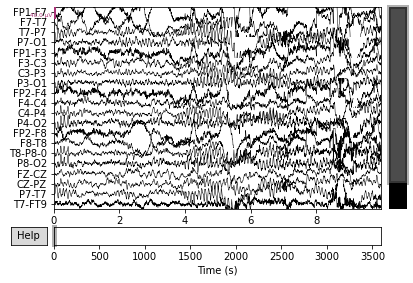

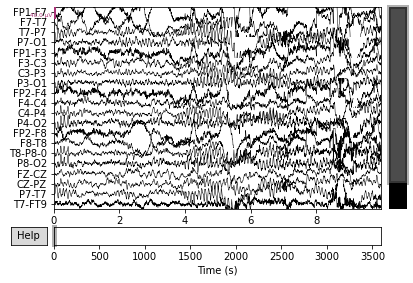

In [6]:
#plotting 23-channel EEG signal
print(raw_data.shape)
data.plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

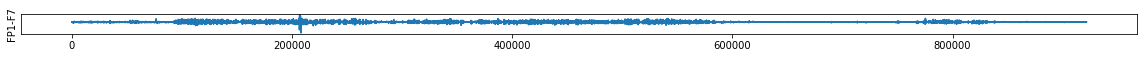

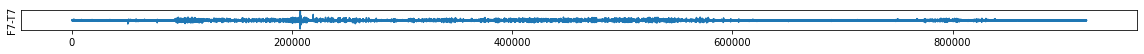

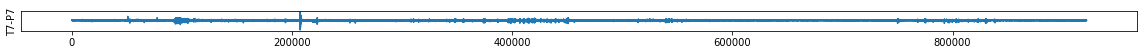

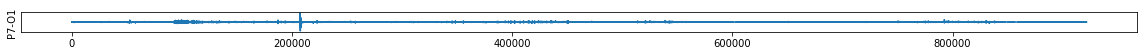

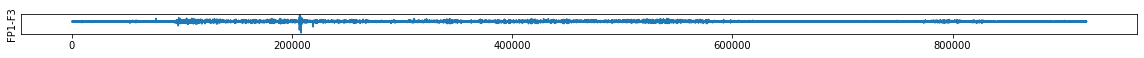

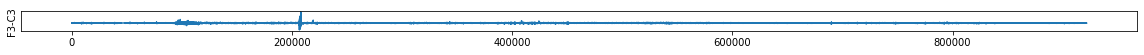

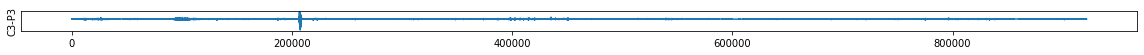

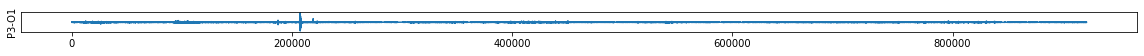

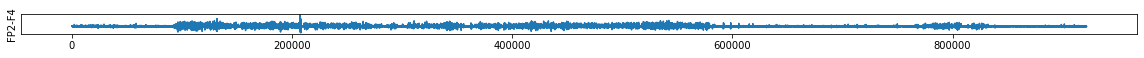

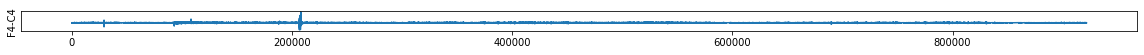

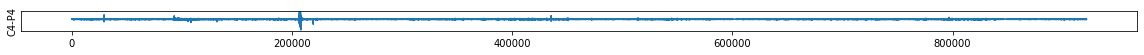

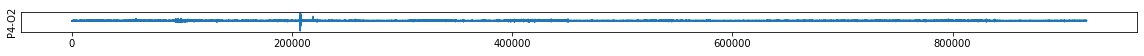

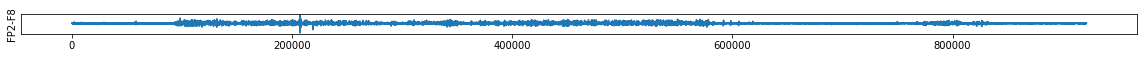

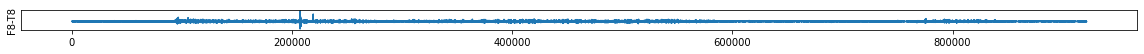

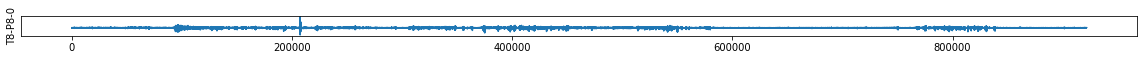

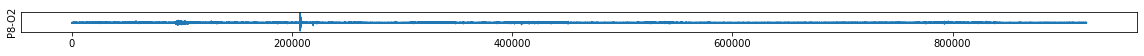

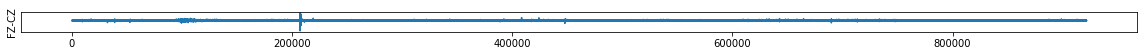

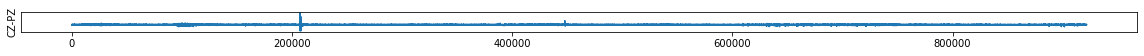

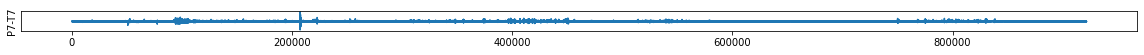

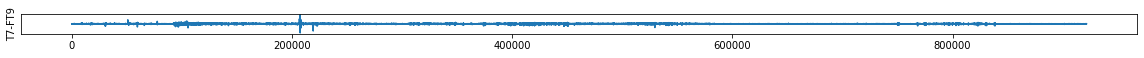

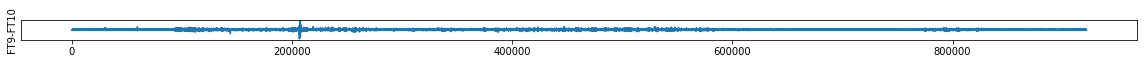

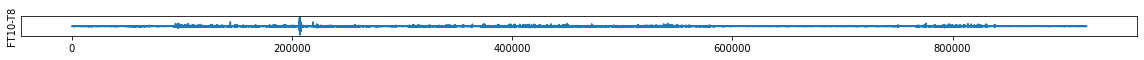

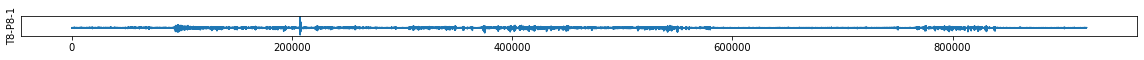

In [7]:
# plotting original data using matplotlib
for i in range (len(channels)):
  fig = plt.figure(figsize=(20,10))
  plt.subplot(len(channels),1,i+1)
  plt.plot(raw_data[i])
  plt.ylabel(channels[i])
  plt.yticks([])

In [9]:
def PRD(x,x_reconstructed):
  '''
  Percent Root Mean Square Difference (PRD) 
  metric used to calculate the percentage value of the distruptions between 
  the original dataset and the reduced dataset 
  '''

  return np.sqrt(np.sum((x-x_reconstructed)**2)/np.sum(x**2))*100
    
def RMSE(x,x_reconstructed):
  '''
  Root Mean Square Error (RMSE)
  allows to calculate the value of the error between the 
  original dataset and the reduced dataset 
  '''
  return np.sqrt(np.sum((x-x_reconstructed)**2)/x.size)

def CR(x,x_reduced):
  '''
  Compression ratio (CR) 
  used to calculate the percentage ratio between the bit number 
  in the original dataset and the number in reduced dataset 
  '''
  return x.size/x_reduced.size*100


#**Signal reduction methods**



###PCA 

Text(0.5, 0, 'Principal Components')

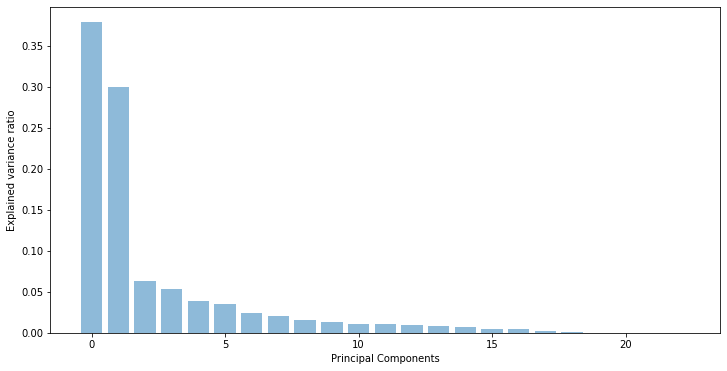

In [19]:
# PCA along timeframe
# checking for the proper amount of principal components
pca=PCA()
pca.fit(raw_data)
cumsum=np.cumsum(pca.explained_variance_ratio_)
transformed_pca = pca.transform(raw_data)
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(12, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')

Text(0.5, 1.0, 'Accumulated variance')

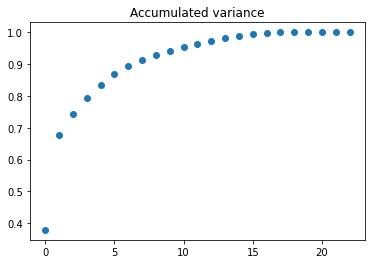

In [ ]:
#plotting the accumulated variance
fig, ax = plt.subplots()
ax.plot(cumsum,'o')
ax.set_title('Accumulated variance')

In [21]:
# constants used in figure plotting
x=[i for i in range(1,23)]
ylabels=["PRD %","RMSE ", "CS %"]

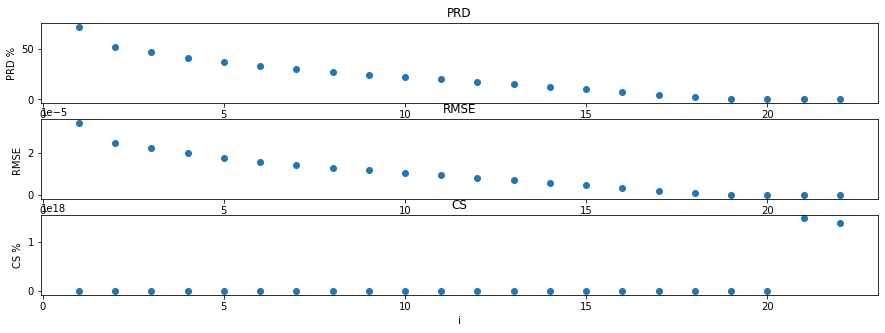

In [22]:
# plotting RMSE, PRD and CS 
PRD_i=[]
RMSE_i=[]
CR_i=[]
CS_i=[]

for i in range(1,23):
    pca=PCA(n_components=i)
    reduced_data=pca.fit_transform(raw_data)
    X_recovered = pca.inverse_transform(reduced_data)

    prd=PRD(raw_data,X_recovered)
    rmse=RMSE(raw_data,X_recovered)
    cr=CR(raw_data,reduced_data)
    cs=cr/prd
    PRD_i.append(prd)
    RMSE_i.append(rmse)
    CR_i.append(cr)
    CS_i.append(cs)

fig, axs = plt.subplots(3, figsize=(15,5))
axs[0].plot(x, PRD_i,'o')
axs[0].set_title('PRD')
axs[1].plot(x, RMSE_i,'o')
axs[1].set_title('RMSE')
axs[2].plot(x,CS_i,'o' )
axs[2].set_title('CS')

for ax,label in zip(axs.flat,ylabels):
    ax.set(xlabel='i', ylabel=label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

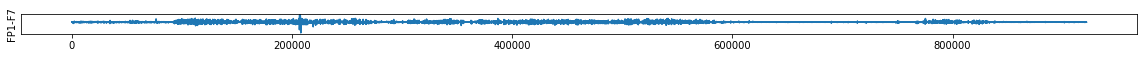

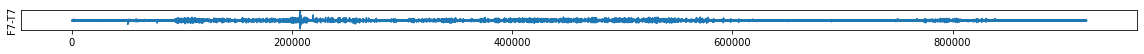

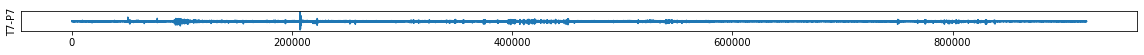

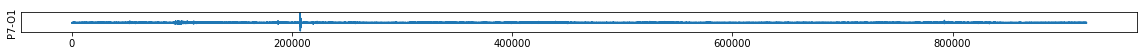

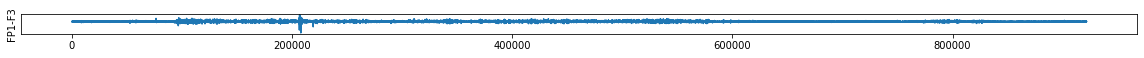

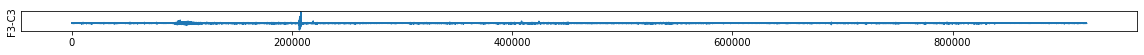

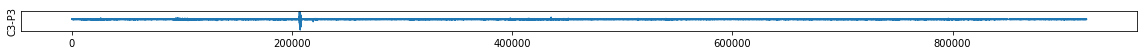

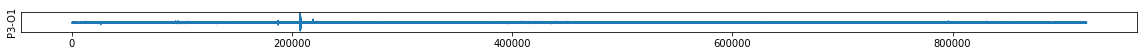

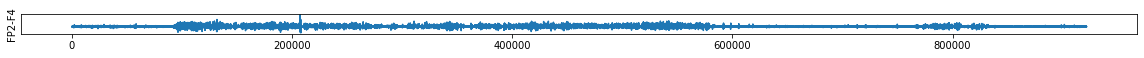

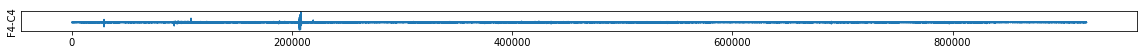

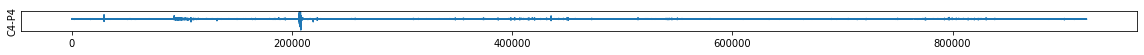

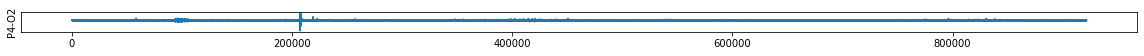

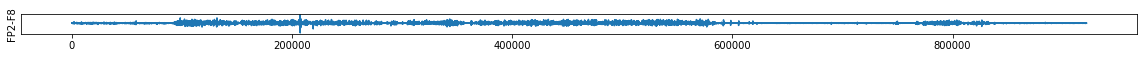

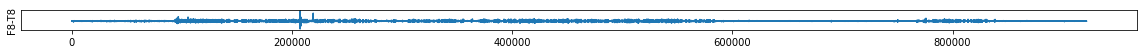

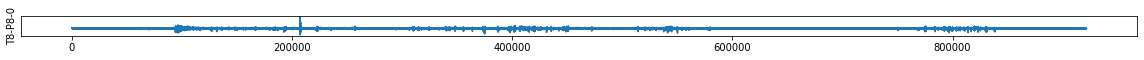

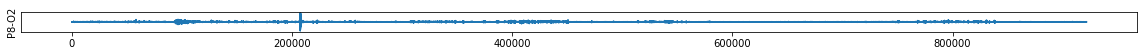

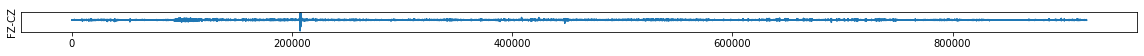

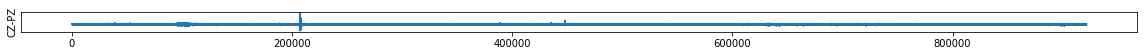

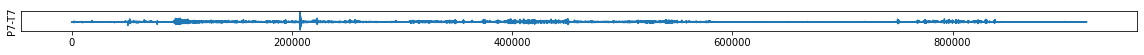

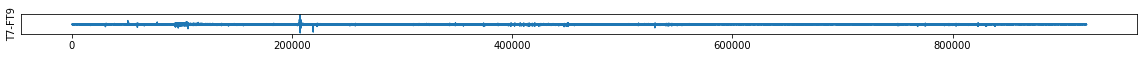

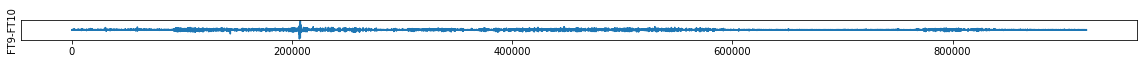

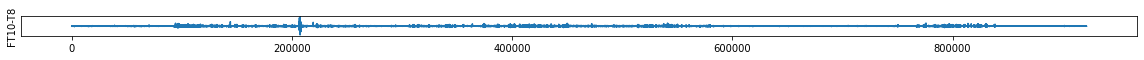

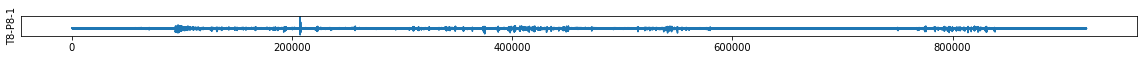

In [31]:
# reconstructing the signal after PCA along timeframe
pca=PCA(n_components=15)
pca.fit(raw_data)
transformed_pca=pca.transform(raw_data)
transformed_pca = pca.inverse_transform(transformed_pca)

for i in range (len(transformed_pca)):
  fig = plt.figure(figsize=(20,10))
  plt.subplot(len(transformed_pca),1,i+1)
  plt.plot(transformed_pca[i])
  plt.ylabel(channels[i])
  plt.yticks([])

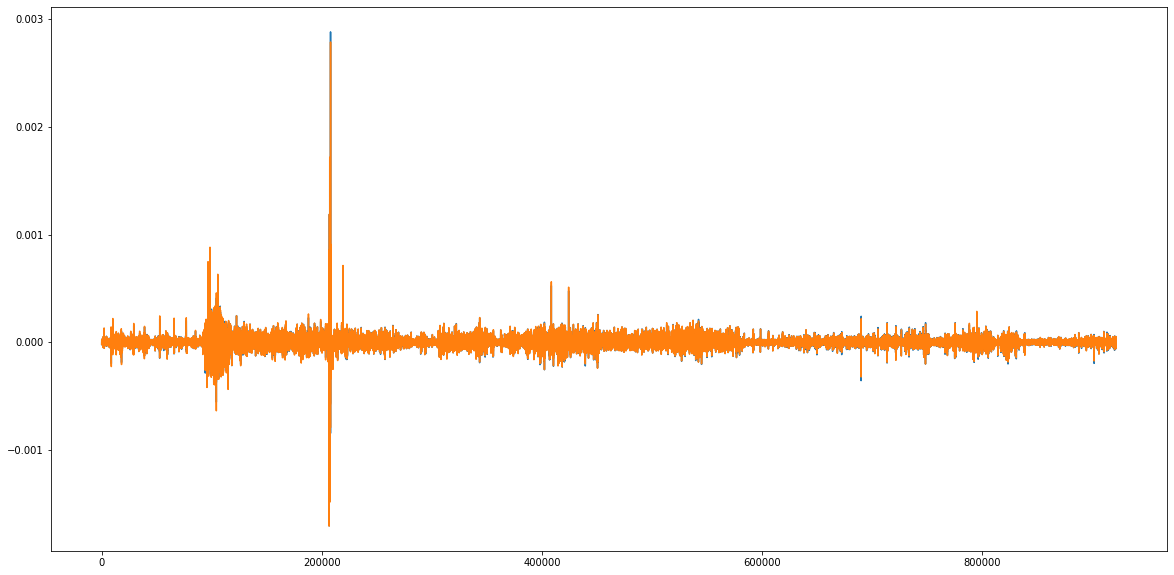

In [40]:
# comparing reconstructed signal with original 
pca=PCA(n_components=15)
pca.fit(raw_data)
transformed_pca=pca.transform(raw_data)
transformed_pca = pca.inverse_transform(transformed_pca)
fig = plt.figure(figsize=(20,10))
plt.plot(transformed_pca[5])
plt.plot(raw_data[5])

Text(0.5, 0, 'Principal Components')

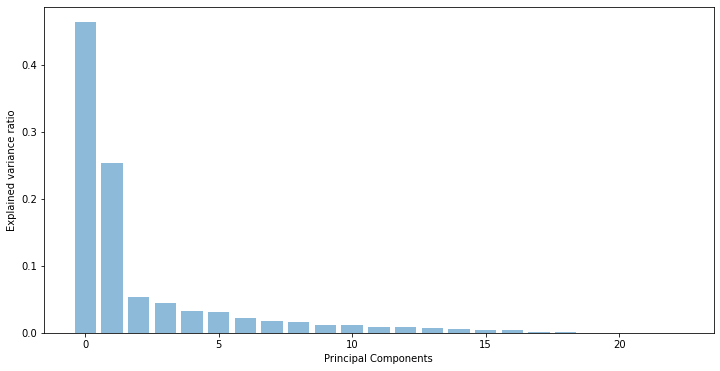

In [23]:
# PCA along channels
# checking for the proper amount of principal components
pca=PCA()
pca.fit(raw_data_T)
cumsum=np.cumsum(pca.explained_variance_ratio_)
transformed_pca2 = pca.transform(raw_data_T)
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(12, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')

Text(0.5, 1.0, 'Accumulated variance')

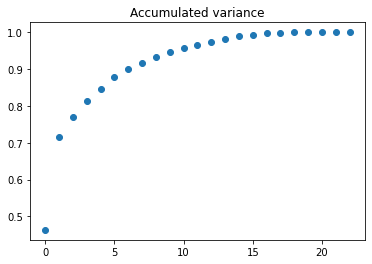

In [24]:
#plotting the accumulated variance
fig, ax = plt.subplots()
ax.plot(cumsum,'o')
ax.set_title('Accumulated variance')

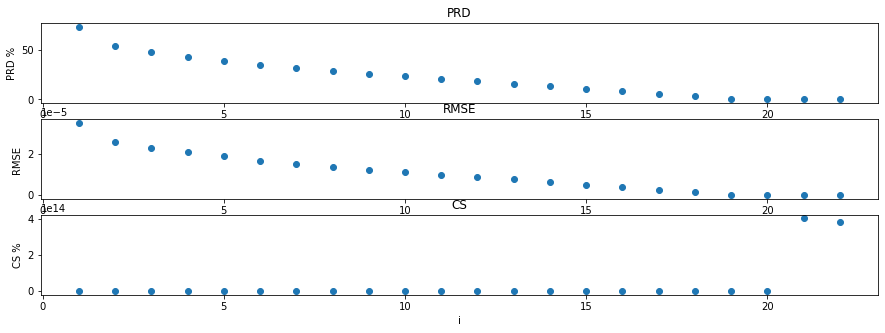

In [25]:
# plotting RMSE, PRD and CS 
PRD_i=[]
RMSE_i=[]
CR_i=[]
CS_i=[]

for i in range(1,23):
    pca=PCA(n_components=i)
    reduced_data=pca.fit_transform(raw_data_T)
    X_recovered = pca.inverse_transform(reduced_data)

    prd=PRD(raw_data_T,X_recovered)
    rmse=RMSE(raw_data_T,X_recovered)
    cr=CR(raw_data_T,reduced_data)
    cs=cr/prd
    PRD_i.append(prd)
    RMSE_i.append(rmse)
    CR_i.append(cr)
    CS_i.append(cs)

fig, axs = plt.subplots(3, figsize=(15,5))
axs[0].plot(x, PRD_i,'o')
axs[0].set_title('PRD')
axs[1].plot(x, RMSE_i,'o')
axs[1].set_title('RMSE')
axs[2].plot(x,CS_i,'o' )
axs[2].set_title('CS')

for ax,label in zip(axs.flat,ylabels):
    ax.set(xlabel='i', ylabel=label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

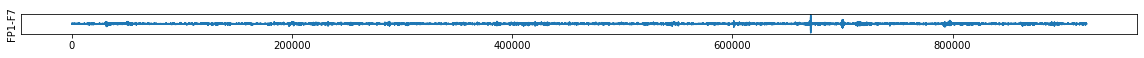

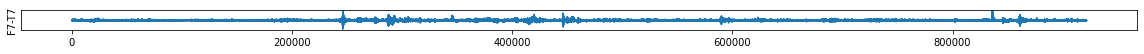

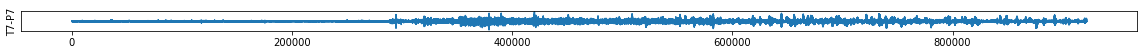

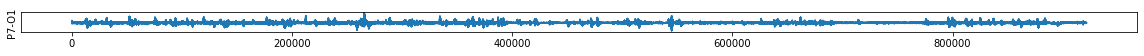

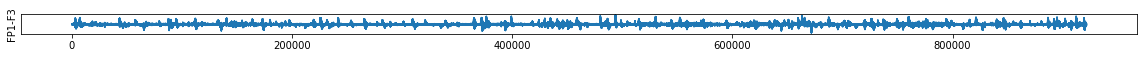

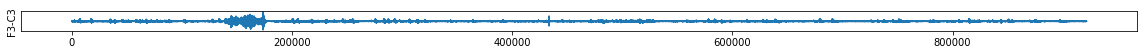

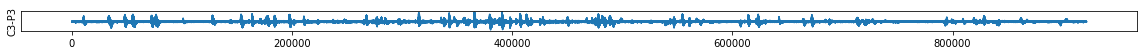

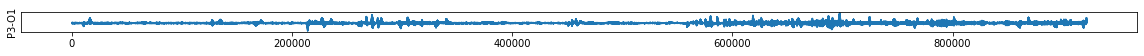

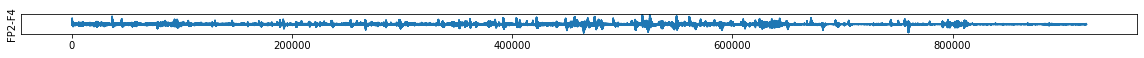

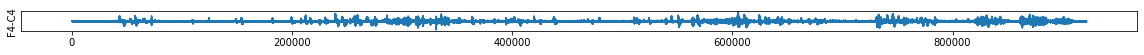

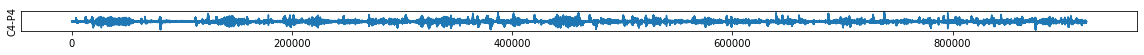

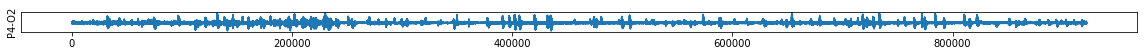

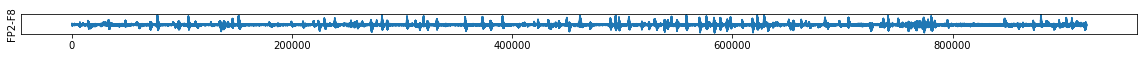

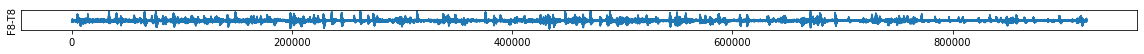

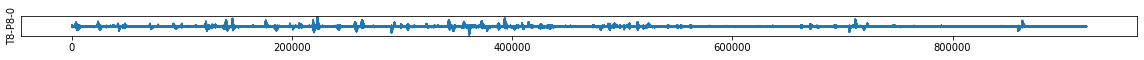

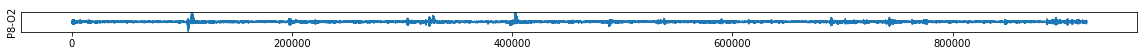

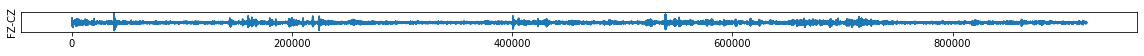

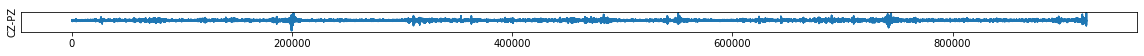

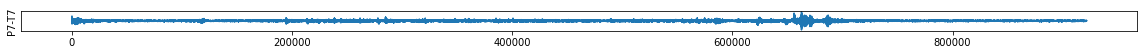

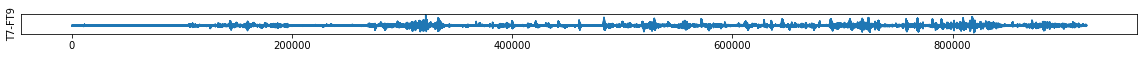

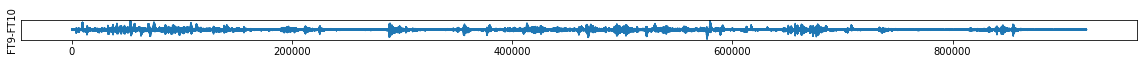

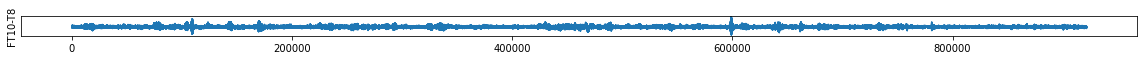

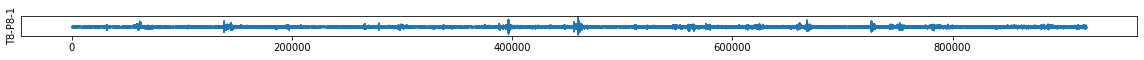

In [32]:
# reconstructing the signal after PCA along channels
pca=PCA(n_components=15)
pca.fit(raw_data_T)
transformed_pca=pca.transform(raw_data_T)
transformed_pca = pca.inverse_transform(transformed_pca)
transformed_p = transformed_pca.reshape(23,921600)
for i in range (len(transformed_p)):
  fig = plt.figure(figsize=(20,10))
  plt.subplot(len(transformed_p),1,i+1)
  plt.plot(transformed_p[i])
  plt.ylabel(channels[i])
  plt.yticks([])


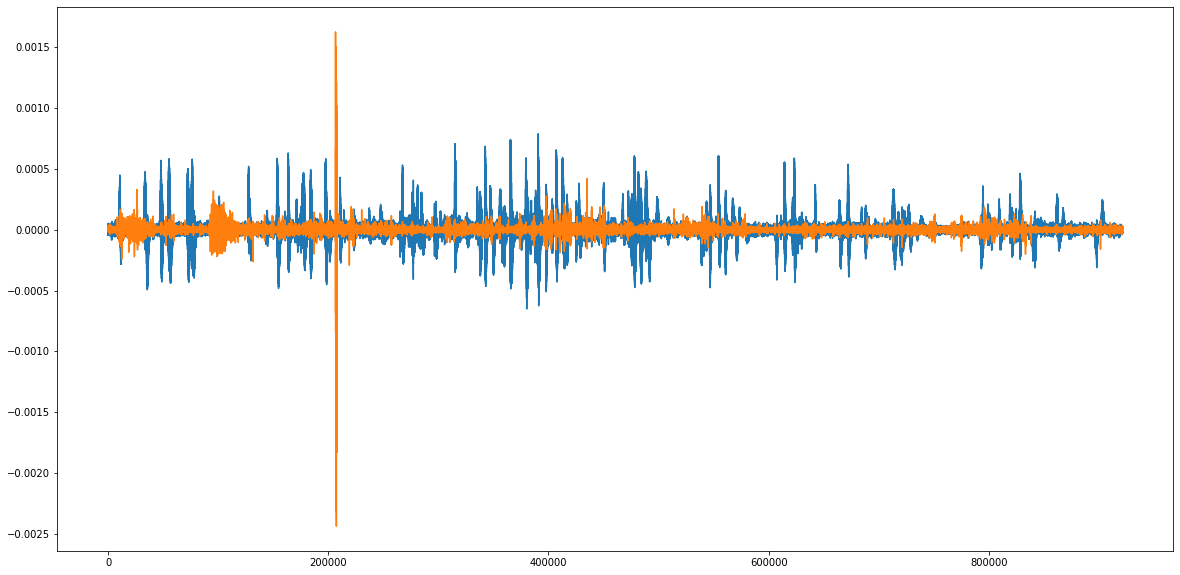

In [42]:
# comparing reconstructed signal with original 
transformed_pca_T=pca.transform(raw_data_T)
transformed_pca_T = pca.inverse_transform(transformed_pca_T)
transfromed_p = transformed_pca_T.reshape(23,921600)
fig = plt.figure(figsize=(20,10))
plt.plot(transformed_p[6])
plt.plot(raw_data[6])

###TSVD

In [43]:
# TSVD
# along timeframe
tsvd=TruncatedSVD(n_components=13)
tsvd.fit(raw_data)
cumsum=np.cumsum(tsvd.explained_variance_ratio_)

Text(0.5, 1.0, 'Accumulated variance')

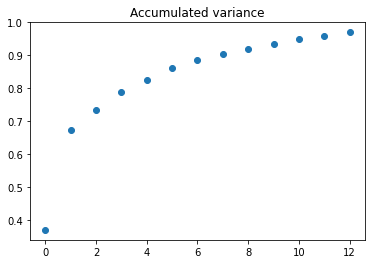

In [44]:
#plottting accumulated variance
fig, ax = plt.subplots()
ax.plot(cumsum,'o')
ax.set_title('Accumulated variance')

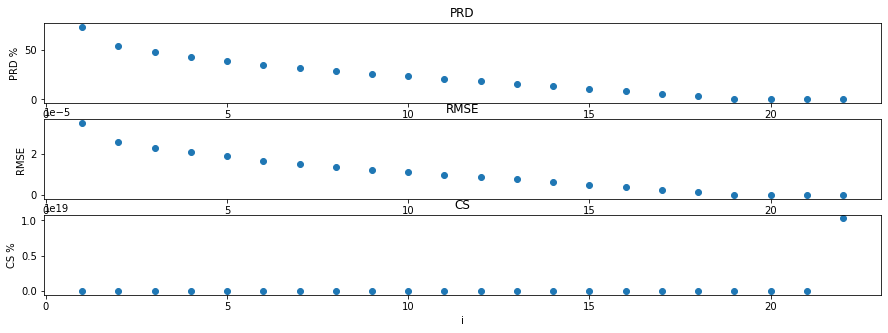

In [ ]:
# plotting RMSE, PRD and CS for TSVD
PRD_i=[]
RMSE_i=[]
CS_i=[]

for i in range(1,23):
    tsvd=TruncatedSVD(n_components=i)
    reduced_data=tsvd.fit_transform(raw_data)
    X_recovered = tsvd.inverse_transform(reduced_data)
    prd=PRD(raw_data,X_recovered)
    rmse=RMSE(raw_data,X_recovered)
    cr=CR(raw_data,reduced_data)
    cs=cr/prd
    PRD_i.append(prd)
    RMSE_i.append(rmse)
    CS_i.append(cs)


fig, axs = plt.subplots(3, figsize=(15,5))
axs[0].plot(x, PRD_i,'o')
axs[0].set_title('PRD')
axs[1].plot(x, RMSE_i,'o')
axs[1].set_title('RMSE')
axs[2].plot(x,CS_i,'o' )
axs[2].set_title('CS')


for ax,label in zip(axs.flat,ylabels):
    ax.set(xlabel='i', ylabel=label)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `fi

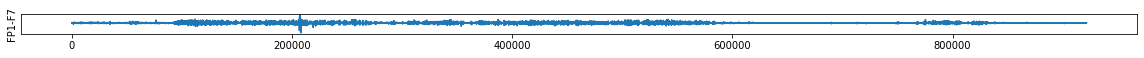

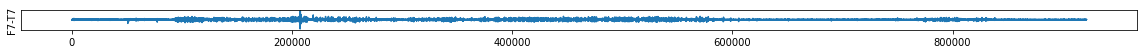

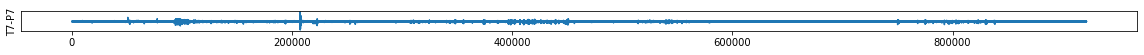

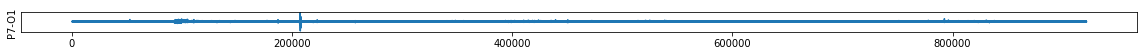

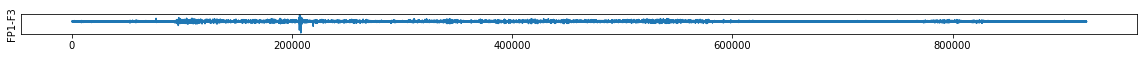

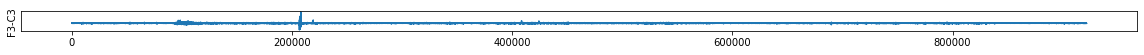

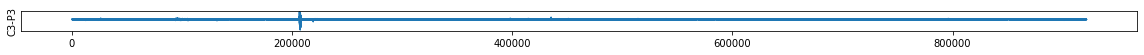

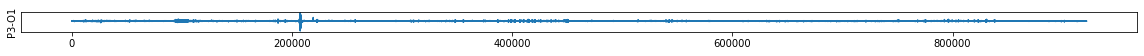

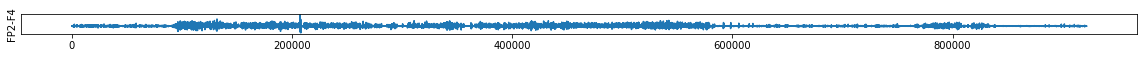

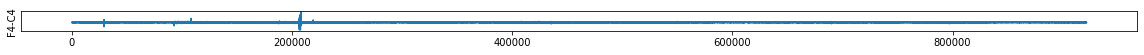

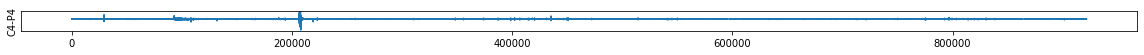

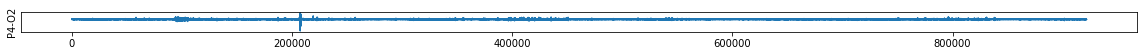

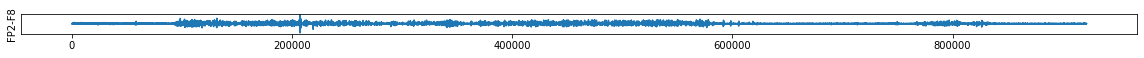

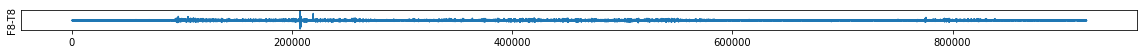

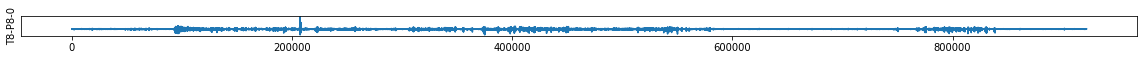

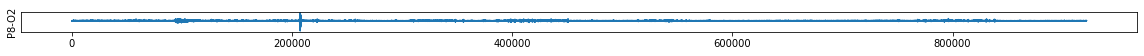

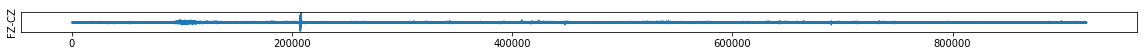

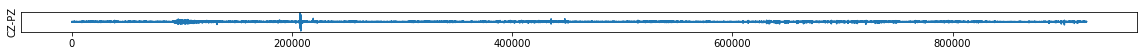

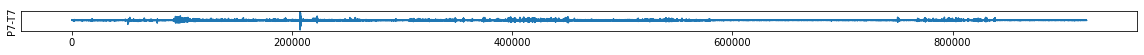

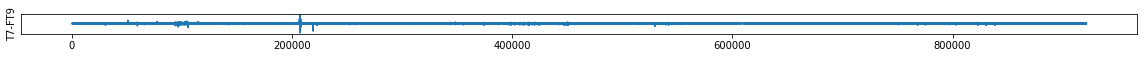

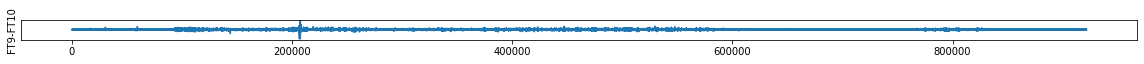

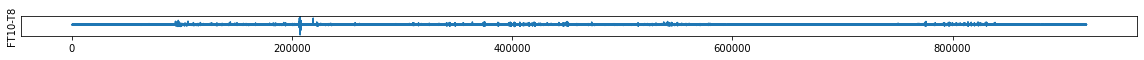

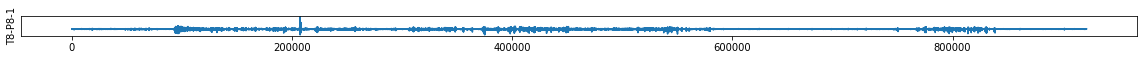

In [54]:
# reconstructing the signal after TSVD
tsvd=TruncatedSVD(n_components=13)
tsvd.fit(raw_data)
transformed_tsvd=tsvd.transform(raw_data)
transformed_tsvd = tsvd.inverse_transform(transformed_tsvd)
for i in range (len(transformed_tsvd)):
  fig = plt.figure(figsize=(20,10))
  plt.subplot(len(transformed_tsvd),1,i+1)
  plt.plot(transformed_tsvd[i])
  plt.ylabel(channels[i])
  plt.yticks([])

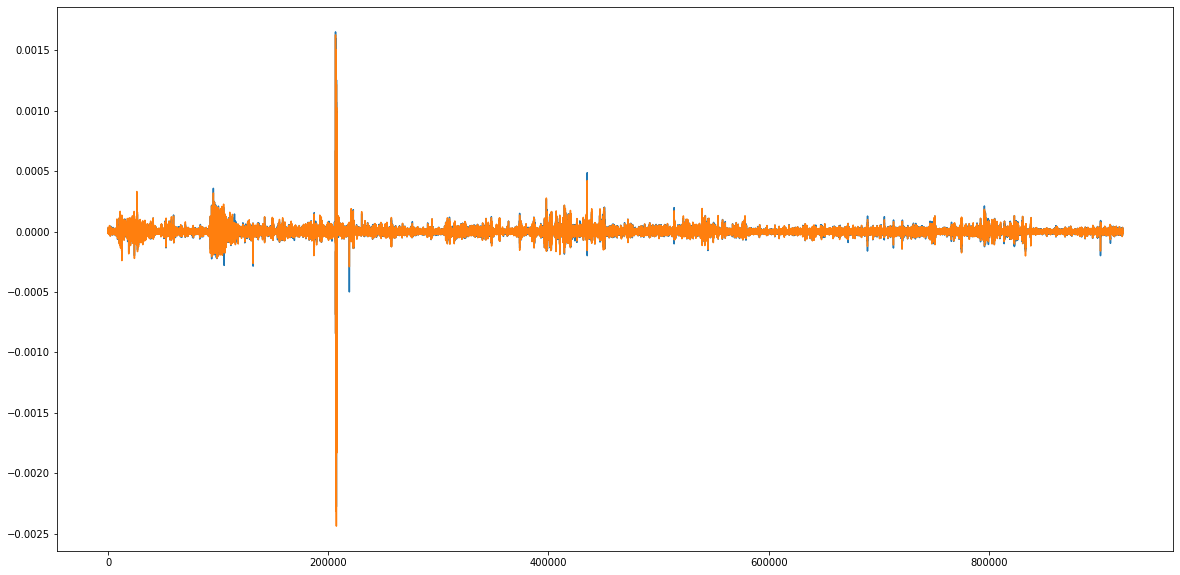

In [56]:
# comparing reconstructed signal with original 
transformed_tsvd=tsvd.transform(raw_data)
transformed_tsvd = tsvd.inverse_transform(transformed_tsvd)
fig = plt.figure(figsize=(20,10))
plt.plot(transformed_tsvd[6])
plt.plot(raw_data[6])

In [46]:
# TSVD
# along channels
tsvd=TruncatedSVD(n_components=13)
tsvd.fit(raw_data_T)
cumsum=np.cumsum(tsvd.explained_variance_ratio_)

Text(0.5, 1.0, 'Accumulated variance')

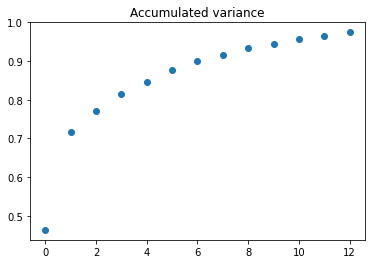

In [47]:
#plottting accumulated variance
fig, ax = plt.subplots()
ax.plot(cumsum,'o')
ax.set_title('Accumulated variance')

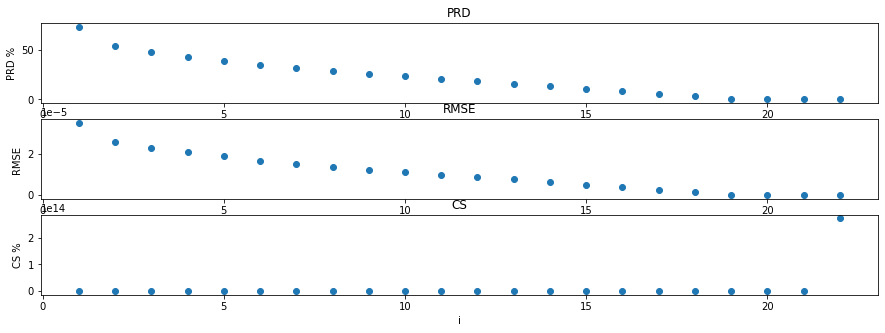

In [48]:
# plotting RMSE, PRD and CS for TSVD
PRD_i=[]
RMSE_i=[]
CS_i=[]

for i in range(1,23):
    tsvd=TruncatedSVD(n_components=i)
    reduced_data=tsvd.fit_transform(raw_data_T)
    X_recovered = tsvd.inverse_transform(reduced_data)
    prd=PRD(raw_data_T,X_recovered)
    rmse=RMSE(raw_data_T,X_recovered)
    cr=CR(raw_data_T,reduced_data)
    cs=cr/prd
    PRD_i.append(prd)
    RMSE_i.append(rmse)
    CS_i.append(cs)


fig, axs = plt.subplots(3, figsize=(15,5))
axs[0].plot(x, PRD_i,'o')
axs[0].set_title('PRD')
axs[1].plot(x, RMSE_i,'o')
axs[1].set_title('RMSE')
axs[2].plot(x,CS_i,'o' )
axs[2].set_title('CS')


for ax,label in zip(axs.flat,ylabels):
    ax.set(xlabel='i', ylabel=label)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

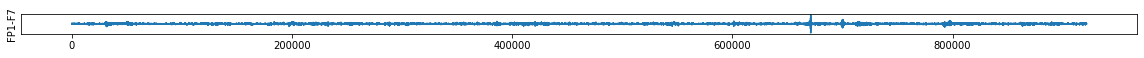

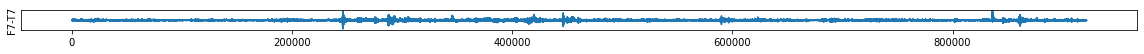

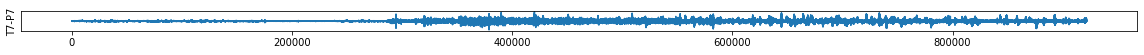

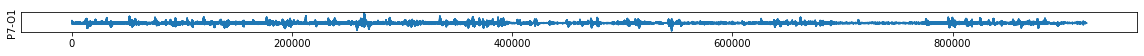

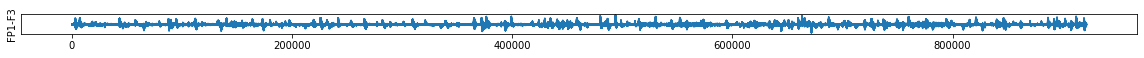

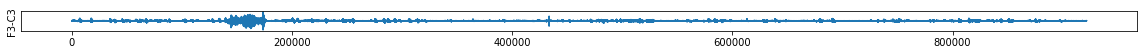

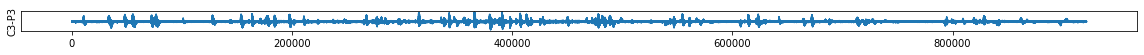

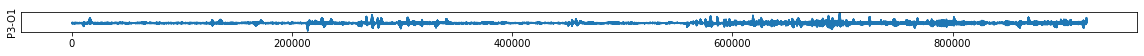

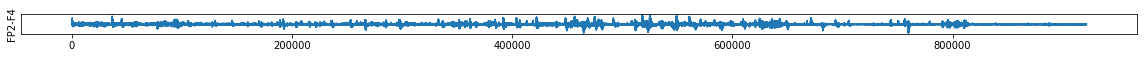

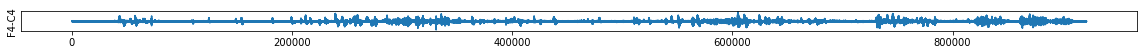

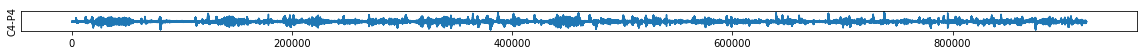

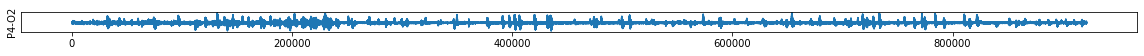

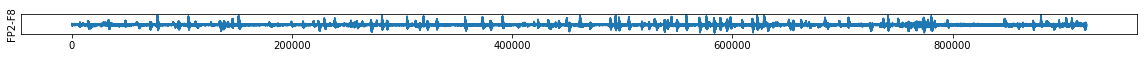

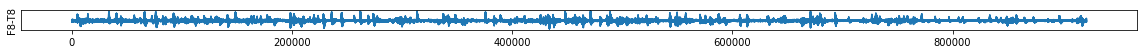

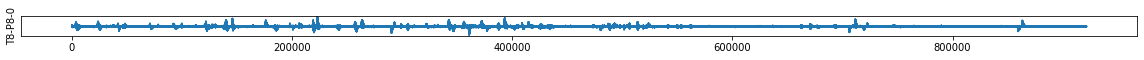

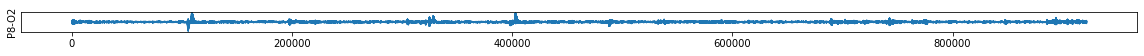

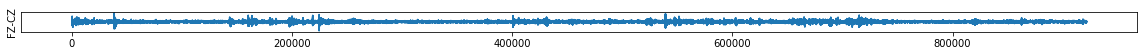

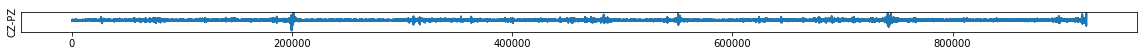

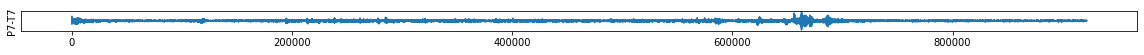

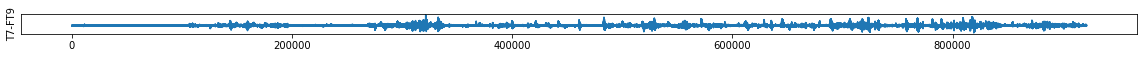

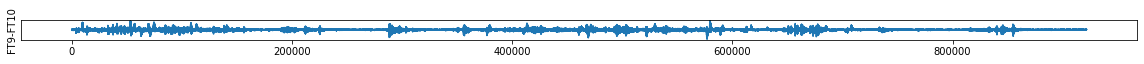

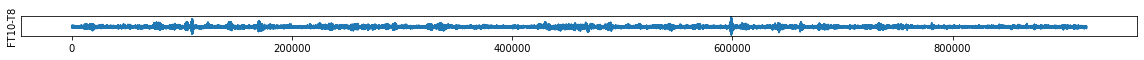

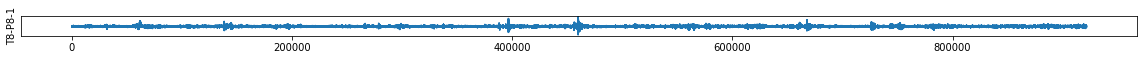

In [50]:
# reconstructing the signal after TSVD
tsvd=TruncatedSVD(n_components=13)
tsvd.fit(raw_data_T)
transformed_tsvd=tsvd.transform(raw_data_T)
transformed_tsvd = tsvd.inverse_transform(transformed_tsvd)
transformed_t = transformed_tsvd.reshape(23,921600)
for i in range (len(transformed_t)):
  fig = plt.figure(figsize=(20,10))
  plt.subplot(len(transformed_t),1,i+1)
  plt.plot(transformed_t[i])
  plt.ylabel(channels[i])
  plt.yticks([])

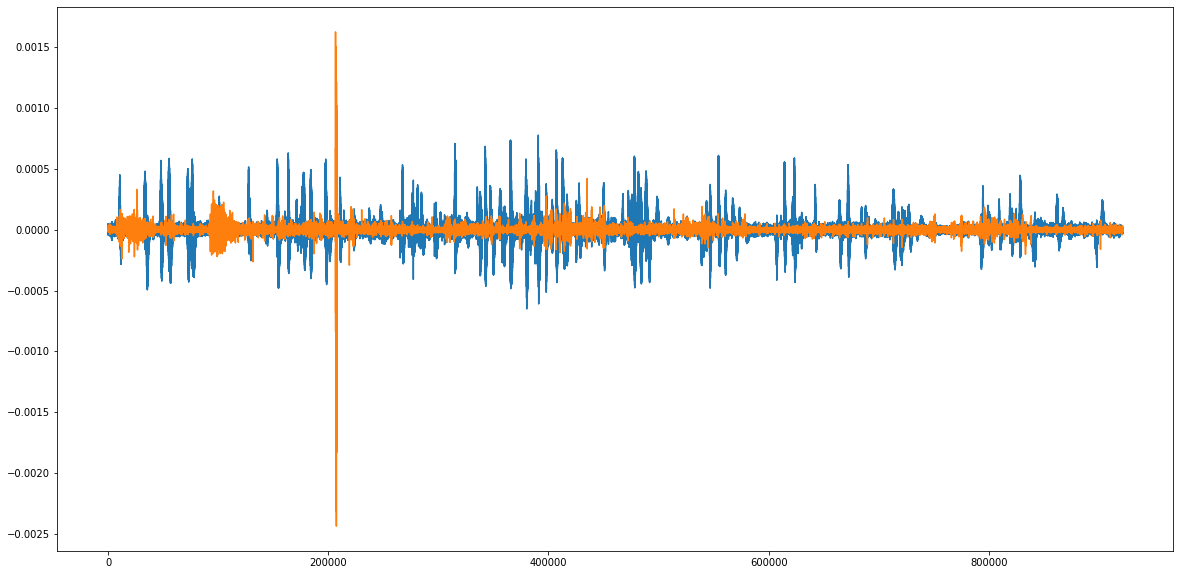

In [53]:
# comparing reconstructed signal with original 
transformed_tsvd_T=tsvd.transform(raw_data_T)
transformed_tsvd_T = tsvd.inverse_transform(transformed_tsvd_T)
transfromed_t = transformed_tsvd_T.reshape(23,921600)
fig = plt.figure(figsize=(20,10))
plt.plot(transformed_t[6])
plt.plot(raw_data[6])